In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pde import CartesianGrid, solve_laplace_equation
print("Setup Complete")

Setup Complete


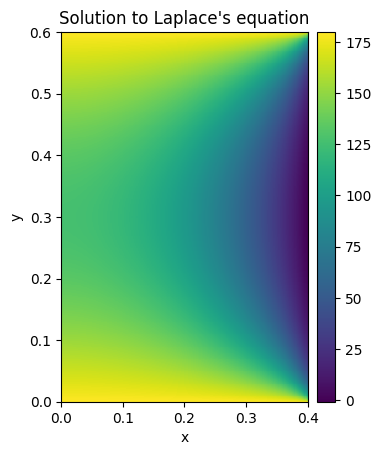

In [2]:
grid = CartesianGrid([[0, 0.4], [0, 0.6]], [200, 400], periodic=[False, False])
bc_x = ({"derivative": 0}, {"type": "mixed", "value": 50/1.5, "const": -2000/3})
bc_y = ({"value": 180}, {"value": 180})
bcs = [bc_x, bc_y]
res = solve_laplace_equation(grid, bcs)
res.plot()

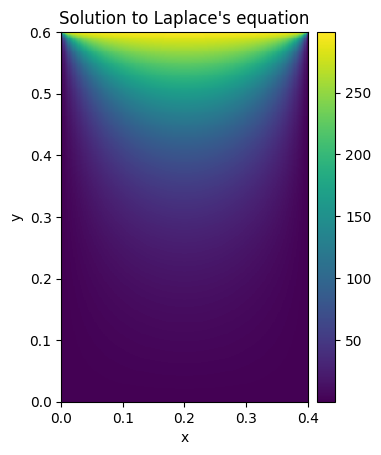

In [4]:
grid = CartesianGrid([[0, 0.4], [0, 0.6]], [200, 400], periodic=[False, False])
bc_x = ({"value": 0}, {"value": 0})
bc_y = ({"value": 0}, {"value": 300})
bcs = [bc_x, bc_y]
res = solve_laplace_equation(grid, bcs)
res.plot()

In [5]:
a = 0.4
b = 0.6
Temp = 180
max_N = 340 

x = np.linspace(0, a, 200)
y = np.linspace(0, b, 400)
X, Y = np.meshgrid(x, y)

N = 1, Error = 21288.551701433007
N = 3, Error = 4361.717497652539
N = 5, Error = 2048.368181897345
N = 7, Error = 1249.3685357125883
N = 9, Error = 865.7976752044709
N = 11, Error = 647.2941683662523
N = 13, Error = 508.9255470388221
N = 15, Error = 414.74293842092607
N = 17, Error = 347.1820029879089
N = 19, Error = 296.74473142394515
N = 21, Error = 257.8905884892167
N = 23, Error = 227.1914268726198
N = 25, Error = 202.42364481749445
N = 27, Error = 182.08808847298528
N = 29, Error = 165.14086579715945
N = 31, Error = 150.83492201981826
N = 33, Error = 138.62291443800413
N = 35, Error = 128.09555185591762
N = 37, Error = 118.94124822426586
N = 39, Error = 110.91901636425773
N = 41, Error = 103.83982788002403
N = 43, Error = 97.553527011042
N = 45, Error = 91.93947195409689
N = 47, Error = 86.89972948383432
N = 49, Error = 82.35405109635045
N = 51, Error = 78.23611311777844
N = 53, Error = 74.49066732337897
N = 55, Error = 71.07135664195448
N = 57, Error = 67.93902292035195
N = 59, 

C:\Users\pc\AppData\Local\Temp\ipykernel_11748\1082354147.py:4: RuntimeWarning: overflow encountered in scalar multiply
  term = 4*T0/(n*np.pi*np.sinh(n*np.pi*a/b))*np.sinh(n*np.pi*(a-x)/b)*np.sin(n*np.pi*y/b)


N = 337, Error = 0.0
N = 339, Error = 0.0


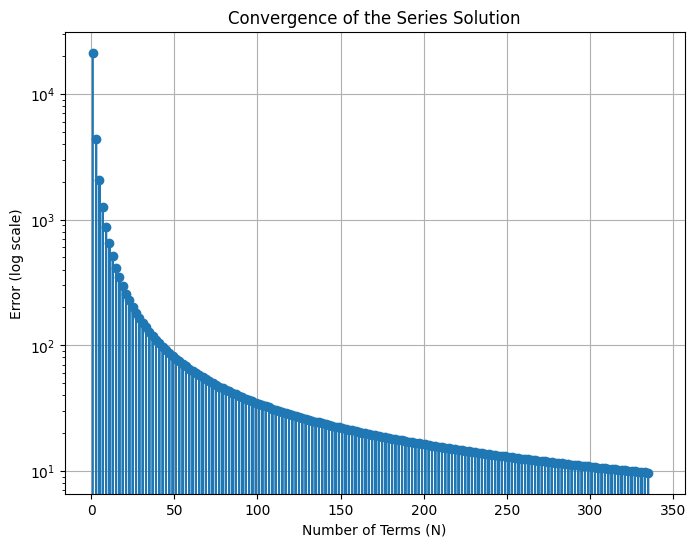

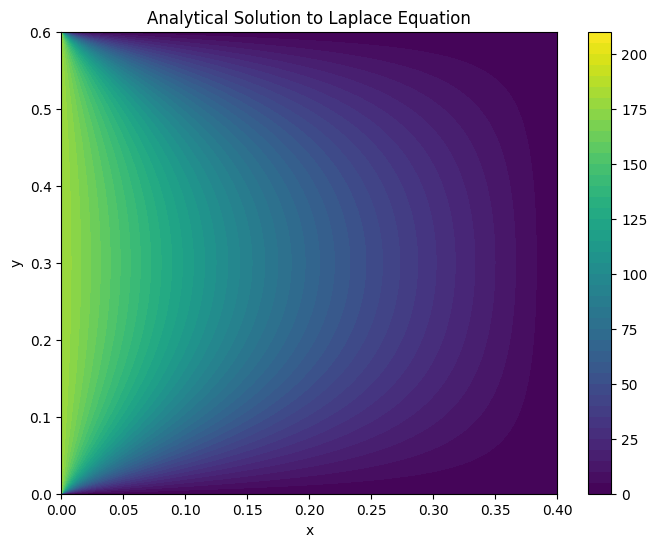

In [6]:
#plt.plot(X, Y, ".k")
#plt.show()
# Check for convergence
errors = []
prev_solution = np.zeros_like(X)

for N in range(1, max_N + 1):
    current_solution = analytical_solver(X, Y, a, b, Temp, N)
    error = np.linalg.norm(current_solution - prev_solution)
    errors.append(error)
    prev_solution = current_solution
    if N%2 == 1:
        print(f"N = {N}, Error = {error}")

# Plot the error in log scale
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_N + 1), errors, marker='o')
plt.yscale('log')
plt.title('Convergence of the Series Solution')
plt.xlabel('Number of Terms (N)')
plt.ylabel('Error (log scale)')
plt.grid(True)
plt.show()

# Plot the final solution
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, current_solution, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Analytical Solution to Laplace Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

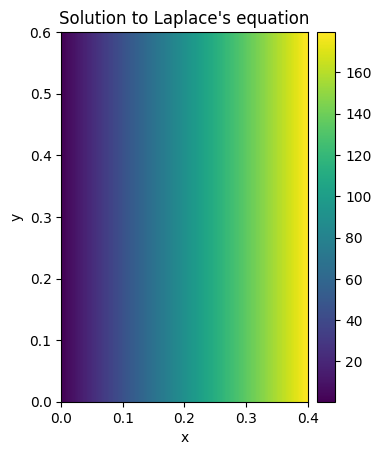

In [7]:
grid = CartesianGrid([[0, 0.4], [0, 0.6]], [200, 400], periodic=[False, False])
bc_x = ({"value": 0}, {"value": 180})
bc_y = ({"derivative": 0}, {"derivative": 0})
bcs = [bc_x, bc_y]
res = solve_laplace_equation(grid, bcs)
res.plot()